In [3]:
#INTROOOO
#Objectiu: contrucció del golden record per acabar obtenint el clustering board!!!

In [4]:
#pip install progressbar
#pip install XXXXXXXXXXX [other packages needed]

import numpy as np
import pandas as pd
from bs4 import BeautifulSoup, SoupStrainer
import sys
import ast
import string
import missingno as msno 
import seaborn as sn
import requests
import datetime
import progressbar
import time
import re
from selenium import webdriver
#from matplotlib import pyplot
from webdriver_manager.chrome import ChromeDriverManager
from pandas_profiling import ProfileReport
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import KNNImputer


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

## 3.1 Importing the clean files

In [5]:
df_drafts = pd.read_excel('Clean_data/All_drafts_Clean.xlsx',index_col=0)
df_teams_standings = pd.read_excel('Clean_data/All_time_teams_clean.xlsx',index_col=0)
df_basic_info = pd.read_excel('Clean_data/Basic_Info_Clean.xlsx',index_col=0)
df_complete_players = pd.read_excel('Clean_data/NBA_Complete_Clean.xlsx',index_col=0)
df_teams_key = pd.read_excel('Clean_data/Teams_key_table.xlsx',index_col=0)

### 3.1.1 Fisrt look to data

In [6]:
df_drafts.head()

,draft_year,draft_round,draft_pick_number,draft_team,player_name,player_url,college
0,2021,1,1,DET,Cade Cunningham,/players/c/cunnica01.html,Not at Basic Info
1,2021,1,2,HOU,Jalen Green,/players/g/greenja05.html,Not at Basic Info
2,2021,1,3,CLE,Evan Mobley,/players/m/mobleev01.html,Not at Basic Info
3,2021,1,4,TOR,Scottie Barnes,/players/b/barnesc01.html,Not at Basic Info
4,2021,1,5,ORL,Jalen Suggs,/players/s/suggsja01.html,Not at Basic Info


In [7]:
df_teams_standings.head()

,team_3_lett,season,league,team_name,wins,losses,w_l_pct,team_name_clean,playoff_team
0,ATL,2021-22,NBA,Atlanta Hawks,16,19,0.457,Atlanta Hawks,0
1,ATL,2020-21,NBA,Atlanta Hawks*,41,31,0.569,Atlanta Hawks,1
2,ATL,2019-20,NBA,Atlanta Hawks,20,47,0.299,Atlanta Hawks,0
3,ATL,2018-19,NBA,Atlanta Hawks,29,53,0.354,Atlanta Hawks,0
4,ATL,2017-18,NBA,Atlanta Hawks,24,58,0.293,Atlanta Hawks,0


In [8]:
df_basic_info.head()

,player_url,player_name,active_from,active_to,position,college,height,weight,birth_date(year),height(cm)
0,/players/a/abdelal01.html,Alaa Abdelnaby,1991,1995,F-C,Duke,6-10,240,1968,208.28
1,/players/a/abdulza01.html,Zaid Abdul-Aziz,1969,1978,C-F,Iowa State,6-9,235,1946,205.74
2,/players/a/abdulka01.html,Kareem Abdul-Jabbar,1970,1989,C,UCLA,7-2,225,1947,218.44
3,/players/a/abdulma02.html,Mahmoud Abdul-Rauf,1991,2001,G,LSU,6-1,162,1969,185.42
4,/players/a/abdulta01.html,Tariq Abdul-Wahad,1998,2003,F,"Michigan, San Jose State",6-6,223,1974,198.12


In [9]:
df_complete_players.head()

,games_started_RegS,field_goals_attempts_pg_RegS,field_goals_percent_pg_RegS,_3pts_goals_attempts_pg_RegS,FT_goals_attempts_pg_RegS,FT_goals_percent_pg_RegS,total_rebounds_pg_RegS,assists_pg_RegS,personal_foults_pg_RegS,points_pg_RegS,...,win_share_Playoff,Hall_Of_Fame,n_NBA_Champ,n_All_Star,college_url,gone_to_college,n_teams,teams_years_dict,player_url,Playoff_flag
0,3,3.0,0.434,0.1,0.6,0.672,2.4,1.3,1.7,3.0,...,0.0,No,0,0,NaN,No,1,"{'team_0': ['Washington Bullets'], 'years_0': ...",/players/t/terryca01.html,Yes
1,0,2.4,0.368,-1.0,0.9,0.571,2.3,0.4,2.3,2.3,...,0.0,No,0,0,NaN,No,1,"{'team_0': ['Baltimore Bullets'], 'years_0': [...",/players/p/priddbo01.html,Yes
2,0,3.5,0.456,-1.0,1.2,0.774,0.6,1.4,1.1,4.1,...,0.0,No,0,0,NaN,No,1,"{'team_0': ['Atlanta Hawks'], 'years_0': ['196...",/players/h/harlisk01.html,Yes
3,11,2.4,0.444,0.1,0.7,0.743,2.0,0.4,2.3,2.7,...,0.0,No,0,0,NaN,No,5,"{'team_0': ['Detroit Pistons'], 'years_0': ['1...",/players/c/curlebi01.html,Yes
4,2,2.8,0.433,0.0,1.0,0.613,2.4,0.3,1.2,3.0,...,0.0,No,0,0,NaN,No,3,"{'team_0': ['Los Angeles Clippers'], 'years_0'...",/players/e/ellisle02.html,Yes


In [10]:
df_teams_key.head()

,team_name_clean,team_3_lett,team_name_21_22
0,Atlanta Hawks,ATL,Atlanta Hawks
1,Milwaukee Hawks,ATL,Atlanta Hawks
2,St. Louis Hawks,ATL,Atlanta Hawks
3,Tri-Cities Blackhawks,ATL,Atlanta Hawks
4,Baltimore Bullets,WAS,Washington Wizards


### 3.2 Merge the complete players the basic info 

In [11]:
df_golden_record_0 = df_complete_players.copy()

df_golden_record_0 = df_golden_record_0.merge(df_basic_info,how='left',on='player_url')

In [12]:
df_golden_record_0.head()

,games_started_RegS,field_goals_attempts_pg_RegS,field_goals_percent_pg_RegS,_3pts_goals_attempts_pg_RegS,FT_goals_attempts_pg_RegS,FT_goals_percent_pg_RegS,total_rebounds_pg_RegS,assists_pg_RegS,personal_foults_pg_RegS,points_pg_RegS,...,Playoff_flag,player_name,active_from,active_to,position,college,height,weight,birth_date(year),height(cm)
0,3,3.0,0.434,0.1,0.6,0.672,2.4,1.3,1.7,3.0,...,Yes,Carlos Terry,1981,1983,G-F,Winston-Salem State,6-5,210,1956,195.58
1,0,2.4,0.368,-1.0,0.9,0.571,2.3,0.4,2.3,2.3,...,Yes,Bob Priddy,1953,1953,F,New Mexico State,6-3,190,1930,190.50
2,0,3.5,0.456,-1.0,1.2,0.774,0.6,1.4,1.1,4.1,...,Yes,Skip Harlicka,1969,1969,G,South Carolina,6-1,185,1946,185.42
3,11,2.4,0.444,0.1,0.7,0.743,2.0,0.4,2.3,2.7,...,Yes,Bill Curley,1995,2001,F,Boston College,6-9,220,1972,205.74
4,2,2.8,0.433,0.0,1.0,0.613,2.4,0.3,1.2,3.0,...,Yes,LeRon Ellis,1992,1996,F-C,"Kentucky, Syracuse",6-9,225,1969,205.74


Now we do some feature engineering related to time (years)

In [13]:
df_golden_record_0['age_entrance'] = df_golden_record_0['active_from'] - df_golden_record_0['birth_date(year)']
df_golden_record_0['age_retirement'] = df_golden_record_0['active_to'] - df_golden_record_0['birth_date(year)']
df_golden_record_0['years_active'] = df_golden_record_0['active_to'] - df_golden_record_0['active_from']

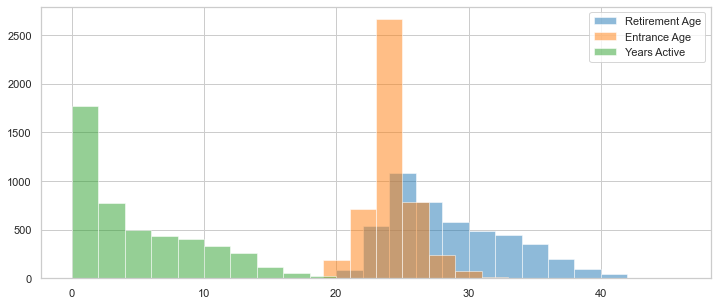

In [14]:
x = df_golden_record_0['age_retirement']
y = df_golden_record_0['age_entrance']
z = df_golden_record_0['years_active']

binwidth = 2

plt.hist(x, alpha=0.5, label='Retirement Age',bins=np.arange(min(x), max(x) + binwidth, binwidth))
plt.hist(y, alpha=0.5, label='Entrance Age',bins=np.arange(min(y), max(y) + binwidth, binwidth))
plt.hist(z, alpha=0.5, label='Years Active',bins=np.arange(min(z), max(z) + binwidth, binwidth))
plt.legend(loc='upper right')
plt.show()

#Conclusió: complicat estar molts anys a la lliga (veure si tens foto de ACB o eurolliga...)

In [15]:
df_golden_record_0 = df_golden_record_0.drop(columns=['height','college_url'])

## 3.3 Merge with the draft info

In [17]:
df_drafts_aux = df_drafts[['player_url','draft_year','draft_round','draft_pick_number']]
df_drafts_aux.head() #not a lot of info beacuase not every player is going to be drafted to go to the NBA

,player_url,draft_year,draft_round,draft_pick_number
0,/players/c/cunnica01.html,2021,1,1
1,/players/g/greenja05.html,2021,1,2
2,/players/m/mobleev01.html,2021,1,3
3,/players/b/barnesc01.html,2021,1,4
4,/players/s/suggsja01.html,2021,1,5


In [18]:
df_golden_record_1 = df_golden_record_0.copy()

df_golden_record_1 = df_golden_record_1.merge(df_drafts_aux,how='left',on='player_url')

In [19]:
df_golden_record_1

,games_started_RegS,field_goals_attempts_pg_RegS,field_goals_percent_pg_RegS,_3pts_goals_attempts_pg_RegS,FT_goals_attempts_pg_RegS,FT_goals_percent_pg_RegS,total_rebounds_pg_RegS,assists_pg_RegS,personal_foults_pg_RegS,points_pg_RegS,...,college,weight,birth_date(year),height(cm),age_entrance,age_retirement,years_active,draft_year,draft_round,draft_pick_number
0,3,3.0,0.434,0.1,0.6,0.672,2.4,1.3,1.7,3.0,...,Winston-Salem State,210,1956,195.58,25,27,2,1978.0,5.0,104.0
1,0,2.4,0.368,-1.0,0.9,0.571,2.3,0.4,2.3,2.3,...,New Mexico State,190,1930,190.50,23,23,0,1952.0,6.0,51.0
2,0,3.5,0.456,-1.0,1.2,0.774,0.6,1.4,1.1,4.1,...,South Carolina,185,1946,185.42,23,23,0,1968.0,1.0,101.0
3,11,2.4,0.444,0.1,0.7,0.743,2.0,0.4,2.3,2.7,...,Boston College,220,1972,205.74,23,29,6,1994.0,1.0,22.0
4,2,2.8,0.433,0.0,1.0,0.613,2.4,0.3,1.2,3.0,...,"Kentucky, Syracuse",225,1969,205.74,23,27,4,1991.0,1.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4737,23,2.9,0.408,0.0,1.2,0.783,2.1,0.2,1.8,3.4,...,UCLA,250,1973,213.36,23,25,2,1995.0,1.0,22.0
4738,0,1.5,0.667,0.0,0.0,0.000,2.0,3.5,2.0,2.0,...,Mississippi State,195,1981,190.50,25,25,0,2003.0,2.0,40.0
4739,0,1.6,0.323,0.0,0.3,0.600,1.8,0.2,0.9,1.2,...,UNLV,240,1996,213.36,21,21,0,2016.0,2.0,41.0
4740,0,0.7,0.200,0.0,0.0,0.000,1.1,0.1,1.3,0.3,...,Kent State University,240,1953,215.90,30,30,0,NaN,NaN,NaN


AxesSubplot(0.125,0.125;0.698618x0.755)
games_started_RegS                 0.000000
field_goals_attempts_pg_RegS       0.000000
field_goals_percent_pg_RegS        0.000000
_3pts_goals_attempts_pg_RegS       0.000000
FT_goals_attempts_pg_RegS          0.000000
FT_goals_percent_pg_RegS           0.000000
total_rebounds_pg_RegS             0.000000
assists_pg_RegS                    0.000000
personal_foults_pg_RegS            0.000000
points_pg_RegS                     0.000000
games_started_Playoff              0.391607
field_goals_attempts_pg_Playoff    0.391607
field_goals_percent_pg_Playoff     0.391607
_3pts_goals_attempts_pg_Playoff    0.391607
FT_goals_attempts_pg_Playoff       0.391607
FT_goals_percent_pg_Playoff        0.391607
total_rebounds_pg_Playoff          0.391607
assists_pg_Playoff                 0.391607
personal_foults_pg_Playoff         0.391607
points_pg_Playoff                  0.391607
FT_goals_attempts_total_RegS       0.000000
assists_total_RegS                 0

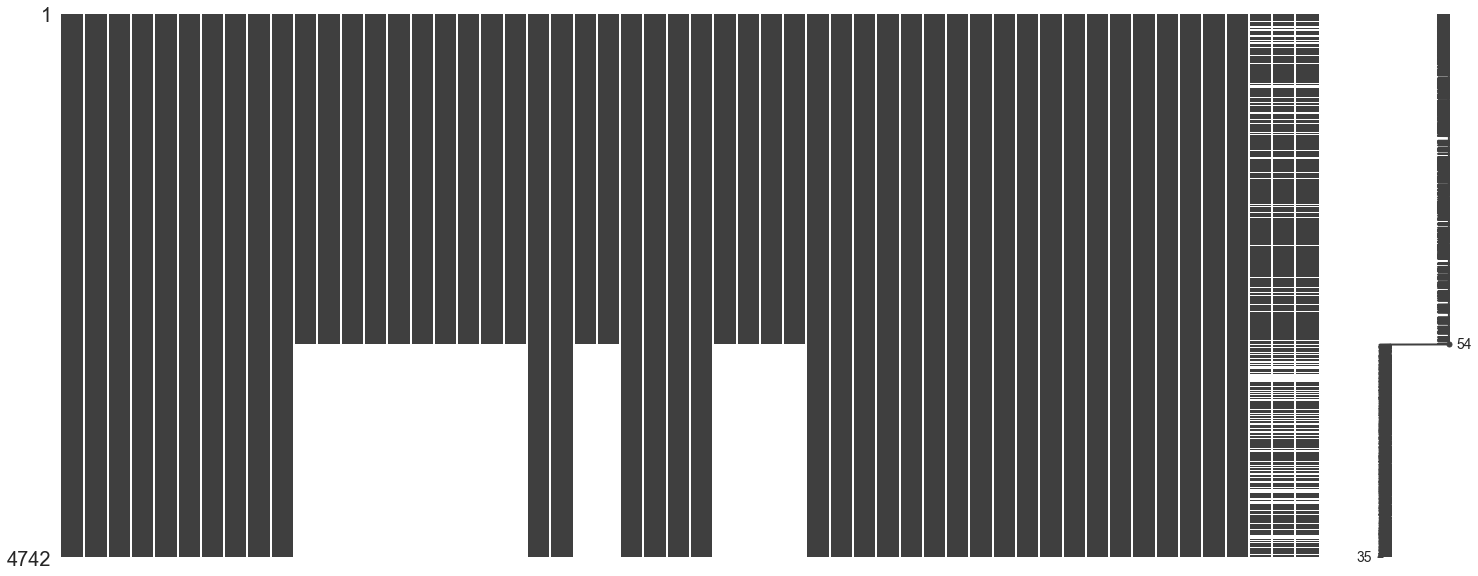

In [20]:
print(msno.matrix(df_golden_record_1.sort_values(by='field_goals_attempts_pg_Playoff')))
print(df_golden_record_1.isna().sum()/len(df_golden_record_1))

We have to do smthg with the 22% people that hasn't been drafted -> drop players who have'nt beeen drafted!!! (for purpose of the model!!!)

In [21]:
df_golden_record_1 = df_golden_record_1.dropna(subset=['draft_year'])
df_golden_record_1 = df_golden_record_1.reset_index(drop=True)

df_golden_record_1['draft_year'] = df_golden_record_1['draft_year'].astype(int)
df_golden_record_1['draft_round'] = df_golden_record_1['draft_round'].astype(int)
df_golden_record_1['draft_pick_number'] = df_golden_record_1['draft_pick_number'].astype(int)
df_golden_record_1

,games_started_RegS,field_goals_attempts_pg_RegS,field_goals_percent_pg_RegS,_3pts_goals_attempts_pg_RegS,FT_goals_attempts_pg_RegS,FT_goals_percent_pg_RegS,total_rebounds_pg_RegS,assists_pg_RegS,personal_foults_pg_RegS,points_pg_RegS,...,college,weight,birth_date(year),height(cm),age_entrance,age_retirement,years_active,draft_year,draft_round,draft_pick_number
0,3,3.0,0.434,0.1,0.6,0.672,2.4,1.3,1.7,3.0,...,Winston-Salem State,210,1956,195.58,25,27,2,1978,5,104
1,0,2.4,0.368,-1.0,0.9,0.571,2.3,0.4,2.3,2.3,...,New Mexico State,190,1930,190.50,23,23,0,1952,6,51
2,0,3.5,0.456,-1.0,1.2,0.774,0.6,1.4,1.1,4.1,...,South Carolina,185,1946,185.42,23,23,0,1968,1,101
3,11,2.4,0.444,0.1,0.7,0.743,2.0,0.4,2.3,2.7,...,Boston College,220,1972,205.74,23,29,6,1994,1,22
4,2,2.8,0.433,0.0,1.0,0.613,2.4,0.3,1.2,3.0,...,"Kentucky, Syracuse",225,1969,205.74,23,27,4,1991,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3692,0,2.6,0.286,0.0,0.3,1.000,1.8,0.1,1.6,1.8,...,Arizona State,210,1957,203.20,23,23,0,1979,2,32
3693,23,2.9,0.408,0.0,1.2,0.783,2.1,0.2,1.8,3.4,...,UCLA,250,1973,213.36,23,25,2,1995,1,22
3694,0,1.5,0.667,0.0,0.0,0.000,2.0,3.5,2.0,2.0,...,Mississippi State,195,1981,190.50,25,25,0,2003,2,40
3695,0,1.6,0.323,0.0,0.3,0.600,1.8,0.2,0.9,1.2,...,UNLV,240,1996,213.36,21,21,0,2016,2,41


## 3.4 Merge with team played info

In [22]:
# features to create:
    # mean win loss pctg
    # number of wins
    # number of playoffs
    # most popular team played -> more years or with 

In [23]:
df_teams_standings.head()

,team_3_lett,season,league,team_name,wins,losses,w_l_pct,team_name_clean,playoff_team
0,ATL,2021-22,NBA,Atlanta Hawks,16,19,0.457,Atlanta Hawks,0
1,ATL,2020-21,NBA,Atlanta Hawks*,41,31,0.569,Atlanta Hawks,1
2,ATL,2019-20,NBA,Atlanta Hawks,20,47,0.299,Atlanta Hawks,0
3,ATL,2018-19,NBA,Atlanta Hawks,29,53,0.354,Atlanta Hawks,0
4,ATL,2017-18,NBA,Atlanta Hawks,24,58,0.293,Atlanta Hawks,0


In [24]:
df_teams_key.head() #used to convert the origin name to the actual teams, and to relate with the standings Dataframe

,team_name_clean,team_3_lett,team_name_21_22
0,Atlanta Hawks,ATL,Atlanta Hawks
1,Milwaukee Hawks,ATL,Atlanta Hawks
2,St. Louis Hawks,ATL,Atlanta Hawks
3,Tri-Cities Blackhawks,ATL,Atlanta Hawks
4,Baltimore Bullets,WAS,Washington Wizards


In [25]:
aux_df = df_golden_record_1[['teams_years_dict','n_teams','player_url']]
print(aux_df['n_teams'].max()) #max number of teams
aux_df.head()

13


,teams_years_dict,n_teams,player_url
0,"{'team_0': ['Washington Bullets'], 'years_0': ...",1,/players/t/terryca01.html
1,"{'team_0': ['Baltimore Bullets'], 'years_0': [...",1,/players/p/priddbo01.html
2,"{'team_0': ['Atlanta Hawks'], 'years_0': ['196...",1,/players/h/harlisk01.html
3,"{'team_0': ['Detroit Pistons'], 'years_0': ['1...",5,/players/c/curlebi01.html
4,"{'team_0': ['Los Angeles Clippers'], 'years_0'...",3,/players/e/ellisle02.html


In [26]:
for row in range(0,len(aux_df)):
    if row==0:
        dictionary_var = aux_df['teams_years_dict'][row]
        dictionary_var = ast.literal_eval(dictionary_var)
        df_teams_per_player = pd.DataFrame.from_dict(dictionary_var)
        df_teams_per_player['player_url'] = aux_df['player_url'][row]
    else:
        dictionary_var = aux_df['teams_years_dict'][row]
        dictionary_var = ast.literal_eval(dictionary_var)
        df_teams_per_player_aux = pd.DataFrame.from_dict(dictionary_var)
        df_teams_per_player_aux['player_url'] = aux_df['player_url'][row]
        
        df_teams_per_player = pd.concat([df_teams_per_player,df_teams_per_player_aux],ignore_index=True)

In [27]:
df_teams_per_player.head()

,team_0,years_0,player_url,team_1,years_1,team_2,years_2,team_3,years_3,team_4,...,team_9,years_9,team_10,years_10,team_11,years_11,team_12,years_12,team_13,years_13
0,Washington Bullets,1981-1983,/players/t/terryca01.html,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Baltimore Bullets,1953,/players/p/priddbo01.html,Baltimore Bullets,1953,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Atlanta Hawks,1969,/players/h/harlisk01.html,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Detroit Pistons,1995,/players/c/curlebi01.html,Minnesota Timberwolves,1998,Minnesota Timberwolves,1999,Houston Rockets,2000,Golden State Warriors,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Los Angeles Clippers,1992,/players/e/ellisle02.html,Charlotte Hornets,1994,Miami Heat,1996,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df_teams_per_player[df_teams_per_player['years_0'].str.len()>9]

,team_0,years_0,player_url,team_1,years_1,team_2,years_2,team_3,years_3,team_4,...,team_9,years_9,team_10,years_10,team_11,years_11,team_12,years_12,team_13,years_13
2460,Minneapolis Lakers,1959 (Wore 34 in 1st half of Game 4 of 1959 NB...,/players/b/bayloel01.html,Minneapolis Lakers,1959-1960,Los Angeles Lakers,1961-1967,Los Angeles Lakers,1968-1972,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2461,Minneapolis Lakers,1959 (Wore 34 in 1st half of Game 4 of 1959 NB...,/players/b/bayloel01.html,Minneapolis Lakers,1959-1960,Los Angeles Lakers,1961-1967,Los Angeles Lakers,1968-1972,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#Resolem el problema....
df_teams_per_player_1 = df_teams_per_player.copy()

cols = df_teams_per_player_1.columns
years_cols = [i for i in cols if 'year' in i]

for year in years_cols:
    df_teams_per_player_1[year] = df_teams_per_player_1[year].apply(lambda x: x[:x.find('(')] if len(str(x))>9 else str(x).strip() if pd.isna(x)==False else x)

In [30]:
df_teams_per_player_1[df_teams_per_player_1['years_1'].str.len()>9]['years_1']

267                                           2020-2022 
773    2017-18 for a brief stint, again 1/28/20 as a ...
Name: years_1, dtype: object

In [31]:
df_teams_per_player_1['years_1'] = df_teams_per_player_1['years_1'].apply(lambda x: x[:x.find('for')] if len(str(x))>9 else str(x).strip() if pd.isna(x)==False else x)

In [32]:
def get_years(years_):
    
    years_ = years_.strip() #cleaning spaces
    
    if len(years_)== 4:
        return pd.DataFrame({'year':[years_]})
    else:
        splited_years = years_.split('-')
        #print(splited_years)
        return pd.DataFrame(list(range(int(splited_years[0]),int(splited_years[1])+1)),columns = ['year'])

In [33]:
for j in range(0,len(df_teams_per_player_1)):     
    
    row = df_teams_per_player_1.loc[j].dropna()
    cols = row.index
    team_cols = [i for i in cols if 'team' in i]
    years_cols = [i for i in cols if 'year' in i]

    for i in range(0,len(years_cols)):
        aux_df = get_years(row[years_cols[i]])
        aux_df['Team'] = row[team_cols[i]]
        aux_df['player_url'] = row['player_url']
        #print(row['player_url'])
    if j==0:
        df_players_board = aux_df
    else:
        df_players_board = pd.concat([df_players_board,aux_df],ignore_index=True)

In [34]:
df_players_board[df_players_board['year'].str.len()>4]

,year,Team,player_url


In [35]:
df_players_board.head()

,year,Team,player_url
0,1981,Washington Bullets,/players/t/terryca01.html
1,1982,Washington Bullets,/players/t/terryca01.html
2,1983,Washington Bullets,/players/t/terryca01.html
3,1953,Baltimore Bullets,/players/p/priddbo01.html
4,1969,Atlanta Hawks,/players/h/harlisk01.html


In [36]:
df_players_board['year'] = df_players_board['year'].astype(int)
df_players_board.dtypes

year           int32
Team          object
player_url    object
dtype: object

In [37]:
df_teams_standings['season_year'] = df_teams_standings['season'].apply(lambda x: x[:2] + x[-2:])
df_teams_standings['season_year'] = df_teams_standings['season_year'].str.replace("1900","2000")
df_teams_standings['season_year'] = df_teams_standings['season_year'].astype(int)

In [38]:
df_teams_standings

,team_3_lett,season,league,team_name,wins,losses,w_l_pct,team_name_clean,playoff_team,season_year
0,ATL,2021-22,NBA,Atlanta Hawks,16,19,0.457,Atlanta Hawks,0,2022
1,ATL,2020-21,NBA,Atlanta Hawks*,41,31,0.569,Atlanta Hawks,1,2021
2,ATL,2019-20,NBA,Atlanta Hawks,20,47,0.299,Atlanta Hawks,0,2020
3,ATL,2018-19,NBA,Atlanta Hawks,29,53,0.354,Atlanta Hawks,0,2019
4,ATL,2017-18,NBA,Atlanta Hawks,24,58,0.293,Atlanta Hawks,0,2018
...,...,...,...,...,...,...,...,...,...,...
56,WAS,1965-66,NBA,Baltimore Bullets*,38,42,0.475,Baltimore Bullets,1,1966
57,WAS,1964-65,NBA,Baltimore Bullets*,37,43,0.463,Baltimore Bullets,1,1965
58,WAS,1963-64,NBA,Baltimore Bullets,31,49,0.388,Baltimore Bullets,0,1964
59,WAS,1962-63,NBA,Chicago Zephyrs,25,55,0.313,Chicago Zephyrs,0,1963


In [39]:
def get_standings_data(year, team, column):
    
    try:
        data = df_teams_standings[(df_teams_standings['season_year']==year) & (df_teams_standings['team_name_clean']==team)][column].values[0]
    except:
        data = np.nan
    return data

In [40]:
df_players_board['wins'] =  df_players_board.apply(lambda x: get_standings_data(x['year'], x['Team'], 'wins'),axis=1)
df_players_board['w_l_pct'] = df_players_board.apply(lambda x: get_standings_data(x['year'], x['Team'], 'w_l_pct'),axis=1)
df_players_board['playoff_team'] = df_players_board.apply(lambda x: get_standings_data(x['year'], x['Team'], 'playoff_team'),axis=1)
df_players_board['team_3_lett'] = df_players_board.apply(lambda x: get_standings_data(x['year'], x['Team'], 'team_3_lett'),axis=1)

AxesSubplot(0.125,0.125;0.698618x0.755)
year            0.000000
Team            0.000000
player_url      0.000000
wins            0.048831
w_l_pct         0.048831
playoff_team    0.048831
team_3_lett     0.048831
dtype: float64


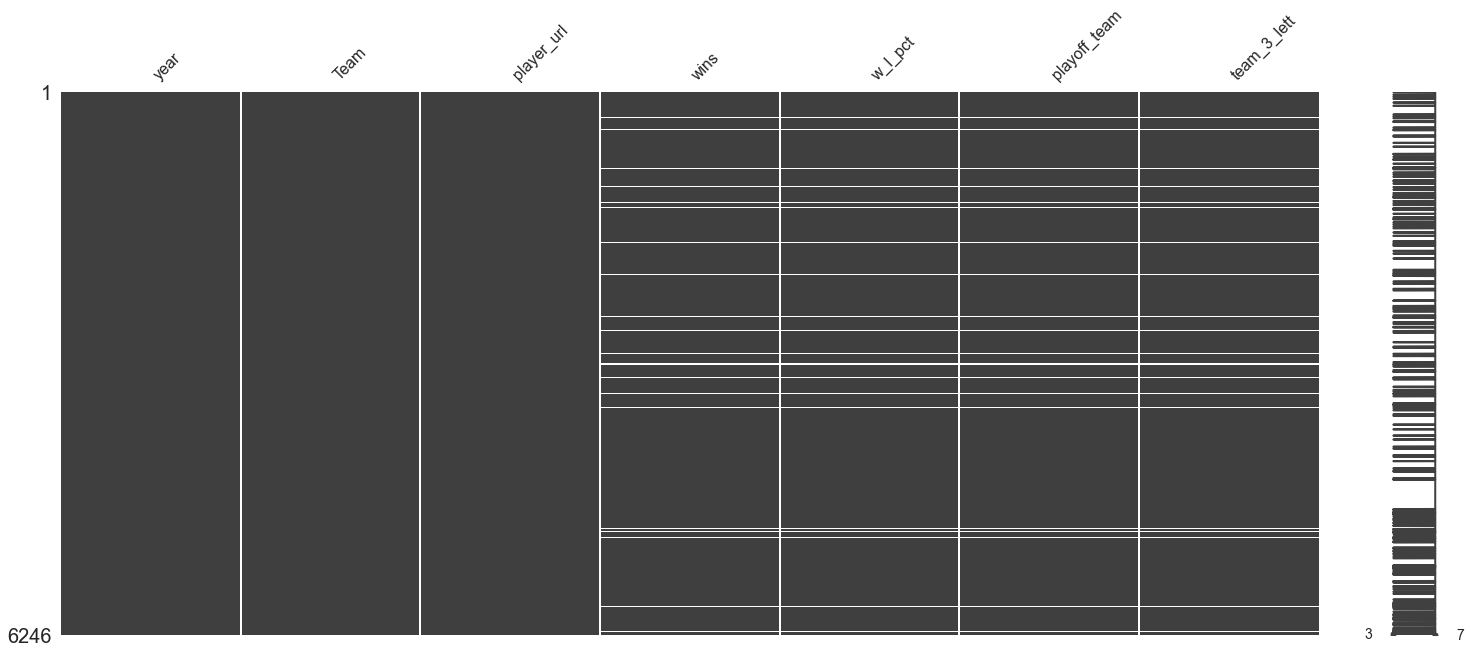

In [41]:
print(msno.matrix(df_players_board))
print(df_players_board.isna().sum()/len(df_players_board))

In [42]:
df_players_board[df_players_board['wins'].isna()]

,year,Team,player_url,wins,w_l_pct,playoff_team,team_3_lett
3,1953,Baltimore Bullets,/players/p/priddbo01.html,NaN,NaN,NaN,NaN
33,1976,Virginia Squires,/players/j/jacksmi01.html,NaN,NaN,NaN,NaN
57,1970,Pittsburgh Pipers,/players/o/ormsba01.html,NaN,NaN,NaN,NaN
81,1953,Baltimore Bullets,/players/b/buntdi01.html,NaN,NaN,NaN,NaN
124,1968,Pittsburgh Pipers,/players/p/parksri01.html,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6205,1971,Carolina Cougars,/players/w/williva01.html,NaN,NaN,NaN,NaN
6207,1973,Memphis Tams,/players/w/wilsois01.html,NaN,NaN,NaN,NaN
6208,1971,Pittsburgh Condors,/players/w/wilsoji01.html,NaN,NaN,NaN,NaN
6225,1954,Baltimore Bullets,/players/w/workmma01.html,NaN,NaN,NaN,NaN


5% of no match becuase they're ABA or BAA teams... so we'll delete it

In [43]:
df_players_board_1 = df_players_board.copy()
df_players_board_1 = df_players_board.dropna().reset_index(drop=True)

In [44]:
df_players_board_1

,year,Team,player_url,wins,w_l_pct,playoff_team,team_3_lett
0,1981,Washington Bullets,/players/t/terryca01.html,39.0,0.476,0.0,WAS
1,1982,Washington Bullets,/players/t/terryca01.html,43.0,0.524,1.0,WAS
2,1983,Washington Bullets,/players/t/terryca01.html,42.0,0.512,0.0,WAS
3,1969,Atlanta Hawks,/players/h/harlisk01.html,48.0,0.585,1.0,ATL
4,2001,Golden State Warriors,/players/c/curlebi01.html,17.0,0.207,0.0,GSW
...,...,...,...,...,...,...,...
5936,1980,Indiana Pacers,/players/z/zenoto01.html,37.0,0.451,0.0,IND
5937,1998,Seattle SuperSonics,/players/z/zidekge01.html,61.0,0.744,1.0,OKC
5938,2006,New Jersey Nets,/players/z/zimmede01.html,49.0,0.598,1.0,NJN
5939,2017,Orlando Magic,/players/z/zimmest01.html,29.0,0.354,0.0,ORL


In [45]:
df_players_board_1 = df_players_board_1.merge(df_teams_key[['team_name_21_22','team_3_lett']],how='left',on='team_3_lett')
df_players_board_1.isna().sum()

year               0
Team               0
player_url         0
wins               0
w_l_pct            0
playoff_team       0
team_3_lett        0
team_name_21_22    0
dtype: int64

In [48]:
df_players_board_agg = df_players_board_1.groupby(by=["player_url"]).agg({'playoff_team':'sum','wins':'sum','w_l_pct':'mean','team_name_21_22':pd.Series.mode})

In [49]:
df_players_board_agg = df_players_board_agg.reset_index()
df_players_board_agg = df_players_board_agg.rename(columns={'playoff_team':'n_playoff','wins':'n_total_wins','team_name_21_22':'most_popular_team_played'})
df_players_board_agg

,player_url,n_playoff,n_total_wins,w_l_pct,most_popular_team_played
0,/players/a/abdelal01.html,0.0,48.0,0.29300,Philadelphia 76ers
1,/players/a/abdulka01.html,26.0,1552.0,0.67600,Los Angeles Lakers
2,/players/a/abdulma01.html,3.0,141.0,0.57300,Golden State Warriors
3,/players/a/abdulma02.html,0.0,46.0,0.28000,Memphis Grizzlies
4,/players/a/abdulta01.html,2.0,117.0,0.71350,Dallas Mavericks
...,...,...,...,...,...
3375,/players/z/zimmest01.html,0.0,29.0,0.35400,Orlando Magic
3376,/players/z/zipsepa01.html,1.0,68.0,0.41450,Chicago Bulls
3377,/players/z/zizican01.html,1.0,88.0,0.37800,Cleveland Cavaliers
3378,/players/z/zopfbi01.html,1.0,66.0,0.80500,Milwaukee Bucks


In [50]:
df_players_board_agg['most_popular_team_played'].value_counts()

Philadelphia 76ers        171
Golden State Warriors     163
Brooklyn Nets             158
Atlanta Hawks             154
Detroit Pistons           152
Sacramento Kings          150
New York Knicks           149
Los Angeles Clippers      143
Washington Wizards        141
Los Angeles Lakers        136
San Antonio Spurs         135
Boston Celtics            129
Denver Nuggets            120
Cleveland Cavaliers       114
Portland Trail Blazers    114
Indiana Pacers            113
Milwaukee Bucks           112
Oklahoma City Thunder     106
Phoenix Suns               97
Houston Rockets            94
Dallas Mavericks           90
Chicago Bulls              90
Utah Jazz                  89
Memphis Grizzlies          75
Minnesota Timberwolves     73
Orlando Magic              71
Miami Heat                 71
Charlotte Hornets          64
Toronto Raptors            63
New Orleans Pelicans       43
Name: most_popular_team_played, dtype: int64

<AxesSubplot:>

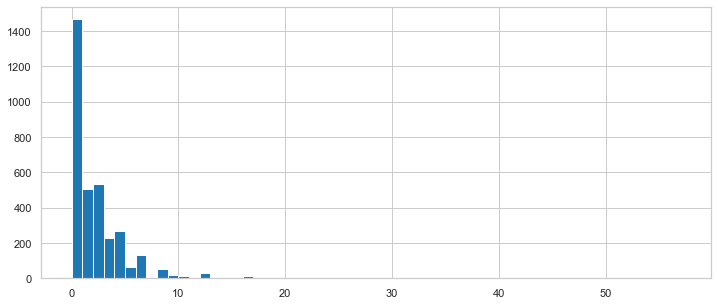

In [51]:
df_players_board_agg['n_playoff'].hist(bins=np.arange(0, df_players_board_agg['n_playoff'].max() + 1, 1)) #fer + maco

In [52]:
df_golden_record_2 = df_golden_record_1.copy()
df_golden_record_2 = df_golden_record_2.merge(df_players_board_agg,how="left",on="player_url")

In [53]:
print(len(df_golden_record_1))
print(len(df_players_board_agg))

3697
3380


In [54]:
df_golden_record_2.isna().sum()

games_started_RegS                    0
field_goals_attempts_pg_RegS          0
field_goals_percent_pg_RegS           0
_3pts_goals_attempts_pg_RegS          0
FT_goals_attempts_pg_RegS             0
FT_goals_percent_pg_RegS              0
total_rebounds_pg_RegS                0
assists_pg_RegS                       0
personal_foults_pg_RegS               0
points_pg_RegS                        0
games_started_Playoff              1229
field_goals_attempts_pg_Playoff    1229
field_goals_percent_pg_Playoff     1229
_3pts_goals_attempts_pg_Playoff    1229
FT_goals_attempts_pg_Playoff       1229
FT_goals_percent_pg_Playoff        1229
total_rebounds_pg_Playoff          1229
assists_pg_Playoff                 1229
personal_foults_pg_Playoff         1229
points_pg_Playoff                  1229
FT_goals_attempts_total_RegS          0
assists_total_RegS                    0
FT_goals_attempts_total_Playoff    1229
assists_total_Playoff              1229
player_eff_rating_RegS                0


In [55]:
df_golden_record_3 = df_golden_record_2.copy()
df_golden_record_3 = df_golden_record_3.dropna(subset=["n_playoff"]).reset_index(drop=True) #we drop all those players without stats from agg table...
df_golden_record_3

,games_started_RegS,field_goals_attempts_pg_RegS,field_goals_percent_pg_RegS,_3pts_goals_attempts_pg_RegS,FT_goals_attempts_pg_RegS,FT_goals_percent_pg_RegS,total_rebounds_pg_RegS,assists_pg_RegS,personal_foults_pg_RegS,points_pg_RegS,...,age_entrance,age_retirement,years_active,draft_year,draft_round,draft_pick_number,n_playoff,n_total_wins,w_l_pct,most_popular_team_played
0,3,3.0,0.434,0.1,0.6,0.672,2.4,1.3,1.7,3.0,...,25,27,2,1978,5,104,6.0,744.0,0.504,Washington Wizards
1,0,3.5,0.456,-1.0,1.2,0.774,0.6,1.4,1.1,4.1,...,23,23,0,1968,1,101,4.0,192.0,0.585,Atlanta Hawks
2,11,2.4,0.444,0.1,0.7,0.743,2.0,0.4,2.3,2.7,...,23,29,6,1994,1,22,0.0,51.0,0.207,Golden State Warriors
3,2,2.8,0.433,0.0,1.0,0.613,2.4,0.3,1.2,3.0,...,23,27,4,1991,1,22,1.0,42.0,0.512,Miami Heat
4,11,5.0,0.507,0.0,1.1,0.720,3.2,0.6,1.4,5.9,...,23,28,5,2008,1,29,2.0,86.0,0.524,Charlotte Hornets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3437,0,2.6,0.286,0.0,0.3,1.000,1.8,0.1,1.6,1.8,...,23,23,0,1979,2,32,0.0,37.0,0.451,Indiana Pacers
3438,23,2.9,0.408,0.0,1.2,0.783,2.1,0.2,1.8,3.4,...,23,25,2,1995,1,22,2.0,122.0,0.744,Oklahoma City Thunder
3439,0,1.5,0.667,0.0,0.0,0.000,2.0,3.5,2.0,2.0,...,25,25,0,2003,2,40,4.0,196.0,0.598,Brooklyn Nets
3440,0,1.6,0.323,0.0,0.3,0.600,1.8,0.2,0.9,1.2,...,21,21,0,2016,2,41,0.0,29.0,0.354,Orlando Magic


In [56]:
df_golden_record_3.columns

Index(['games_started_RegS', 'field_goals_attempts_pg_RegS',
       'field_goals_percent_pg_RegS', '_3pts_goals_attempts_pg_RegS',
       'FT_goals_attempts_pg_RegS', 'FT_goals_percent_pg_RegS',
       'total_rebounds_pg_RegS', 'assists_pg_RegS', 'personal_foults_pg_RegS',
       'points_pg_RegS', 'games_started_Playoff',
       'field_goals_attempts_pg_Playoff', 'field_goals_percent_pg_Playoff',
       '_3pts_goals_attempts_pg_Playoff', 'FT_goals_attempts_pg_Playoff',
       'FT_goals_percent_pg_Playoff', 'total_rebounds_pg_Playoff',
       'assists_pg_Playoff', 'personal_foults_pg_Playoff', 'points_pg_Playoff',
       'FT_goals_attempts_total_RegS', 'assists_total_RegS',
       'FT_goals_attempts_total_Playoff', 'assists_total_Playoff',
       'player_eff_rating_RegS', 'true_shooting_eff_RegS',
       'usage_percent_RegS', 'win_share_RegS', 'player_eff_rating_Playoff',
       'true_shooting_eff_Playoff', 'usage_percent_Playoff',
       'win_share_Playoff', 'Hall_Of_Fame', 'n_NBA_Cham

## 3.5 Other feature engineering

In [57]:
#triple doble
#defensive player ->win_share
#ofensive player -> not possible...
# % winning

In [58]:
df_golden_record_4 = df_golden_record_3.copy()

In [59]:
def aux_metric(num,denom):
    value = num/denom
    if value>1:
        return 1
    else:
        return value

In [60]:
#triple double: (definition)
df_golden_record_4['triple_double_metric_RegS'] = df_golden_record_4.apply(lambda x: 
                                                                           (aux_metric(x['points_pg_RegS'],10)+aux_metric(x['total_rebounds_pg_RegS'],10)+aux_metric(x['assists_pg_RegS'],10))/3, axis=1)

In [61]:
df_golden_record_4['triple_double_metric_Playoff'] = df_golden_record_4.apply(lambda x: 
                                                                           (aux_metric(x['points_pg_Playoff'],10)+aux_metric(x['total_rebounds_pg_Playoff'],10)+aux_metric(x['assists_pg_Playoff'],10))/3 if x['assists_pg_Playoff']!= np.nan else np.nan, axis=1)

In [62]:
#Algun gràfic chulo de distància de RegS a playoff

#df_golden_record_4[df_golden_record_4['triple_double_metric_Playoff'].isna()==False].sort_values(by=['triple_double_metric_Playoff'])['player_url']

In [63]:
#triple double: (definition)
df_golden_record_4['championship_pct'] = df_golden_record_4.apply(lambda x: aux_metric(x['n_NBA_Champ'],x['n_playoff']) if x['n_playoff']> 0  else x['n_playoff'], axis=1)

In [64]:
#Algun gràfic chulo
#df_golden_record_4.sort_values(by=['championship_pct'])['player_url']

In [65]:
#ALTRES VARIABLES????

In [66]:
df_golden_record_4 = df_golden_record_4.drop(columns=['points_pg_RegS','points_pg_Playoff']) #ja usat! i havíem dit d'eliminar

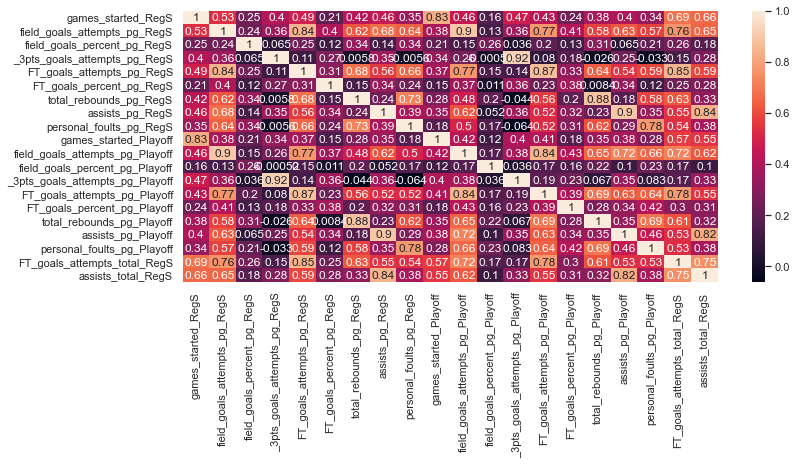

In [67]:
N = 0
M = 20

_columns  = df_golden_record_4.iloc[: , N:M]

corrMatrix = _columns.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

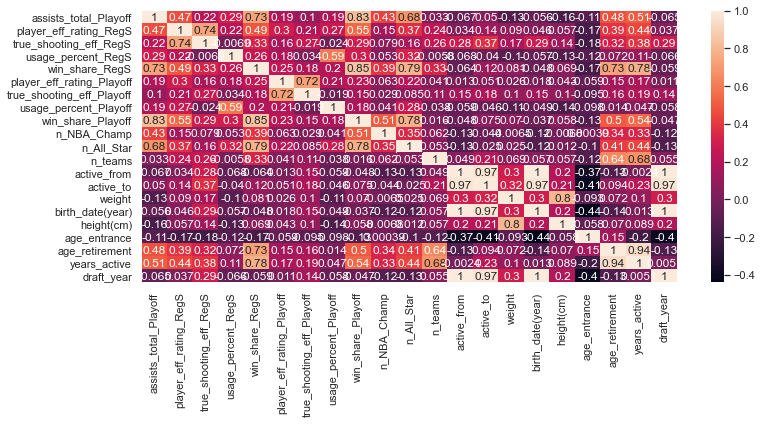

In [68]:
N = 21
M = 50

_columns  = df_golden_record_4.iloc[: , N:M]

corrMatrix = _columns.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

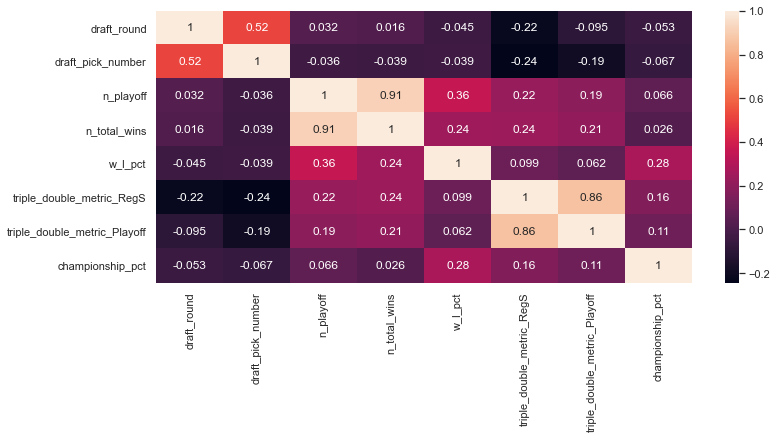

In [69]:
N = 50
M = len(df_golden_record_4)

_columns  = df_golden_record_4.iloc[: , N:M]

corrMatrix = _columns.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [70]:
#Observem correlacions entre algunes variables -> years de començar, wins i playoff, triple_double etc. 
#però les assumim pq ens servirà per descriure millor qualitativament els cluters

In [71]:
df_golden_record_4

,games_started_RegS,field_goals_attempts_pg_RegS,field_goals_percent_pg_RegS,_3pts_goals_attempts_pg_RegS,FT_goals_attempts_pg_RegS,FT_goals_percent_pg_RegS,total_rebounds_pg_RegS,assists_pg_RegS,personal_foults_pg_RegS,games_started_Playoff,...,draft_year,draft_round,draft_pick_number,n_playoff,n_total_wins,w_l_pct,most_popular_team_played,triple_double_metric_RegS,triple_double_metric_Playoff,championship_pct
0,3,3.0,0.434,0.1,0.6,0.672,2.4,1.3,1.7,0.0,...,1978,5,104,6.0,744.0,0.504,Washington Wizards,0.223333,0.010000,0.0
1,0,3.5,0.456,-1.0,1.2,0.774,0.6,1.4,1.1,0.0,...,1968,1,101,4.0,192.0,0.585,Atlanta Hawks,0.203333,0.000000,0.0
2,11,2.4,0.444,0.1,0.7,0.743,2.0,0.4,2.3,0.0,...,1994,1,22,0.0,51.0,0.207,Golden State Warriors,0.170000,0.000000,0.0
3,2,2.8,0.433,0.0,1.0,0.613,2.4,0.3,1.2,0.0,...,1991,1,22,1.0,42.0,0.512,Miami Heat,0.190000,0.000000,0.0
4,11,5.0,0.507,0.0,1.1,0.720,3.2,0.6,1.4,0.0,...,2008,1,29,2.0,86.0,0.524,Charlotte Hornets,0.323333,0.066667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3437,0,2.6,0.286,0.0,0.3,1.000,1.8,0.1,1.6,NaN,...,1979,2,32,0.0,37.0,0.451,Indiana Pacers,0.123333,NaN,0.0
3438,23,2.9,0.408,0.0,1.2,0.783,2.1,0.2,1.8,NaN,...,1995,1,22,2.0,122.0,0.744,Oklahoma City Thunder,0.190000,NaN,0.0
3439,0,1.5,0.667,0.0,0.0,0.000,2.0,3.5,2.0,NaN,...,2003,2,40,4.0,196.0,0.598,Brooklyn Nets,0.250000,NaN,0.0
3440,0,1.6,0.323,0.0,0.3,0.600,1.8,0.2,0.9,NaN,...,2016,2,41,0.0,29.0,0.354,Orlando Magic,0.106667,NaN,0.0


In [72]:
df_golden_record_4.to_excel('Clean_data/Golden_Record.xlsx')

## 3.6 Data analysis with the golden record

In [ ]:
algun gràfic chulo